In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import geopandas

In [2]:
cancer_rates = pd.read_csv("Cancer Rates.csv")
cancer_rates_by_race = pd.read_csv("Cancer Rates Race.csv")

for idx, row in cancer_rates.iterrows():
    # drop rows with unreliable data
    if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
        cancer_rates = cancer_rates.drop(idx)

# convert Mortality-Incidence Age-Adjusted Rate Ratio column to floats
cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"] = cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
cancer_rates["Year"] = cancer_rates["Year"].astype('int')

In [50]:
mel = cancer_rates[cancer_rates["Leading Cancer Sites"] == "Melanoma of the Skin"]
mel[mel["Year"] == 2002]

,Leading Cancer Sites,Year,State,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
10142,Melanoma of the Skin,2002,Alabama,0.203,2.738,13.486
10143,Melanoma of the Skin,2002,Arizona,0.154,3.055,19.789
10144,Melanoma of the Skin,2002,Arkansas,0.198,2.140,10.810
10145,Melanoma of the Skin,2002,California,0.131,2.478,18.861
10146,Melanoma of the Skin,2002,Colorado,0.127,2.716,21.456
10147,Melanoma of the Skin,2002,Connecticut,0.118,2.475,20.897
10148,Melanoma of the Skin,2002,Delaware,0.179,2.882,16.110
10149,Melanoma of the Skin,2002,Florida,0.143,2.771,19.376
10150,Melanoma of the Skin,2002,Georgia,0.130,2.571,19.765
10151,Melanoma of the Skin,2002,Hawaii,0.096,1.672,17.340


In [45]:
totalratesbyrace = cancer_rates_by_race[5114:]
cancerratesbyrace = cancer_rates_by_race[:5040]
totalratesbyrace

,Leading Cancer Sites,Year,Region,Race,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
5114,Midwest,American Indian or Alaska Native,33,NaN,NaN,NaN,NaN
5115,Midwest,Asian or Pacific Islander,103,NaN,NaN,NaN,NaN
5116,Midwest,Black or African American,959,NaN,NaN,NaN,NaN
5117,Midwest,White,8389,NaN,NaN,NaN,NaN
5118,Midwest,Other Races and Unknown combined,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6453,West,American Indian or Alaska Native,28,NaN,NaN,NaN,NaN
6454,West,Asian or Pacific Islander,184,NaN,NaN,NaN,NaN
6455,West,Black or African American,121,NaN,NaN,NaN,NaN
6456,West,White,3128,NaN,NaN,NaN,NaN


In [4]:
leading_cancer_sites = []
for idx, row in cancer_rates.iterrows():
    if row["Leading Cancer Sites"] not in leading_cancer_sites:
        leading_cancer_sites.append(row["Leading Cancer Sites"])

years = []
for idx, row in cancer_rates.iterrows():
    if row["Year"] not in years:
        years.append(row["Year"])
        
races = ["White", "Black or African American", "Asian or Pacific Islander", "American Indian or Alaska Native"]

regions = list(set(list(cancerratesbyrace["Region"])))

states = list(set(list(cancer_rates["State"])))

In [5]:
years

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [6]:
def incbyrace(race, year):
    racedict = {}
    year = str(year)
    raceyear = cancerratesbyrace[cancerratesbyrace["Year"] == year]
    racecancer = raceyear[raceyear["Race"] == race]
    for cancer in leading_cancer_sites:
        racedict[cancer] = 0
        for i in range(len(racecancer)):
            if racecancer.iloc[i]["Leading Cancer Sites"] == cancer:
                racedict[cancer] += racecancer.iloc[i]["Incidence Age-Adjusted Rate (per 100,000)"]
    return racedict

def mortbyrace(race, year):
    racedict = {}
    year = str(year)
    raceyear = cancerratesbyrace[cancerratesbyrace["Year"] == year]
    racecancer = raceyear[raceyear["Race"] == race]
    for cancer in leading_cancer_sites:
        racedict[cancer] = 0
        for i in range(len(racecancer)):
            if racecancer.iloc[i]["Leading Cancer Sites"] == cancer:
                racedict[cancer] += racecancer.iloc[i]["Mortality Age-Adjusted Rate (per 100,000)"]
    return racedict    

In [7]:
mortdict = {}
incdict = {}
for race in races:
    mortdict[race] = mortbyrace(race, "2016")
    incdict[race] = incbyrace(race, "2016")

In [8]:
mortdf = pd.DataFrame(mortdict)
incdf = pd.DataFrame(incdict)

In [9]:
newincdf = pd.DataFrame()
highincdf = pd.DataFrame()
newmortdf = pd.DataFrame()
highmortdf = pd.DataFrame()
for cancer in leading_cancer_sites:
    if cancer in ["Prostate","Colon and Rectum", "Breast", "Lung and Bronchus"]:
        highincdf[cancer] = incdf.loc[cancer]
        highmortdf[cancer] = mortdf.loc[cancer]
    else:
        newincdf[cancer] = incdf.loc[cancer]
        newmortdf[cancer] = mortdf.loc[cancer]
newincdf = newincdf.T
highincdf = highincdf.T
newmortdf = newmortdf.T
highmortdf = highmortdf.T

In [10]:
def cancerdf(cancer):
    cancerdf = pd.DataFrame()
    cancerdf["Incidence"] = incdf.loc[cancer]
    cancerdf["Mortality"] = mortdf.loc[cancer]
    cancerdf = cancerdf.T
    return cancerdf

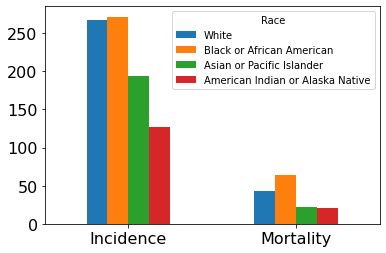

In [11]:
breastdf = cancerdf("Breast")
breastdf[races].plot(kind="bar")
plt.xticks(size=16, rotation=0)
plt.yticks(size=16)
plt.legend(title="Race")

In [12]:
mortdict2005 = {}
incdict2005 = {}
for race in races:
    mortdict2005[race] = mortbyrace(race, "2005")
    incdict2005[race] = incbyrace(race, "2005")
mortdf2005 = pd.DataFrame(mortdict2005)
incdf2005 = pd.DataFrame(incdict2005)

In [13]:
lungdf2005 = pd.DataFrame()
lungdf2005["Incidence"] = incdf2005.loc[cancer]
lungdf2005["Mortality"] = mortdf2005.loc[cancer]
lungdf2005 = lungdf2005.T

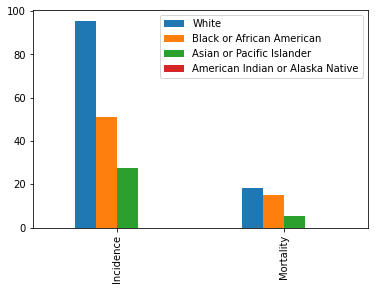

In [14]:
#2005
lungdf = cancerdf("Lung and Bronchus")
lungdf2005[races].plot(kind="bar")
plt.legend(loc="upper right")
#https://www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/resource-library/lung-cancer-fact-sheet
#accounts for 25% of all cancer deaths in a year
#peaked in 2005, has decrease since

In [15]:
mortdict2016 = {}
incdict2016 = {}
for race in races:
    mortdict2016[race] = mortbyrace(race, "2016")
    incdict2016[race] = incbyrace(race, "2016")
mortdf2016 = pd.DataFrame(mortdict2016)
incdf2016 = pd.DataFrame(incdict2016)

In [16]:
lungdf2016 = pd.DataFrame()
lungdf2016["Incidence"] = incdf2016.loc[cancer]
lungdf2016["Mortality"] = mortdf2016.loc[cancer]
lungdf2016 = lungdf2016.T

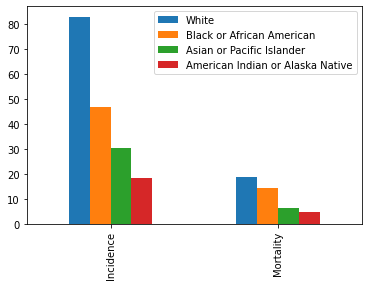

In [17]:
lungdf2016[races].plot(kind="bar")

In [18]:
mortdict1999 = {}
incdict1999 = {}
for race in races:
    mortdict1999[race] = mortbyrace(race, "1999")
    incdict1999[race] = incbyrace(race, "1999")
mortdf1999 = pd.DataFrame(mortdict1999)
incdf1999 = pd.DataFrame(incdict1999)

In [19]:
lungdf1999 = pd.DataFrame()
lungdf1999["Incidence"] = incdf1999.loc[cancer]
lungdf1999["Mortality"] = mortdf1999.loc[cancer]
lungdf1999 = lungdf1999.T

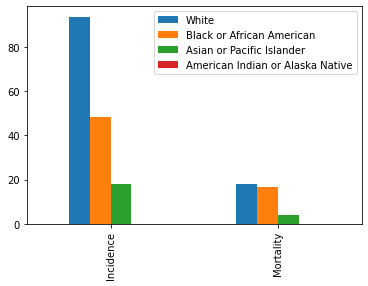

In [20]:
lungdf1999[races].plot(kind="bar")

In [21]:
mortdict2010 = {}
incdict2010 = {}
for race in races:
    mortdict2010[race] = mortbyrace(race, "2010")
    incdict2010[race] = incbyrace(race, "2010")
mortdf2010 = pd.DataFrame(mortdict2010)
incdf2010 = pd.DataFrame(incdict2010)

In [22]:
lungdf2010 = pd.DataFrame()
lungdf2010["Incidence"] = incdf2010.loc[cancer]
lungdf2010["Mortality"] = mortdf2010.loc[cancer]
lungdf2010 = lungdf2010.T

In [23]:
mortdict2007 = {}
incdict2007 = {}
for race in races:
    mortdict2007[race] = mortbyrace(race, "2007")
    incdict2007[race] = incbyrace(race, "2007")
mortdf2007 = pd.DataFrame(mortdict2007)
incdf2007 = pd.DataFrame(incdict2007)

In [24]:
lungdf2007 = pd.DataFrame()
lungdf2007["Incidence"] = incdf2007.loc[cancer]
lungdf2007["Mortality"] = mortdf2007.loc[cancer]
lungdf2007 = lungdf2007.T

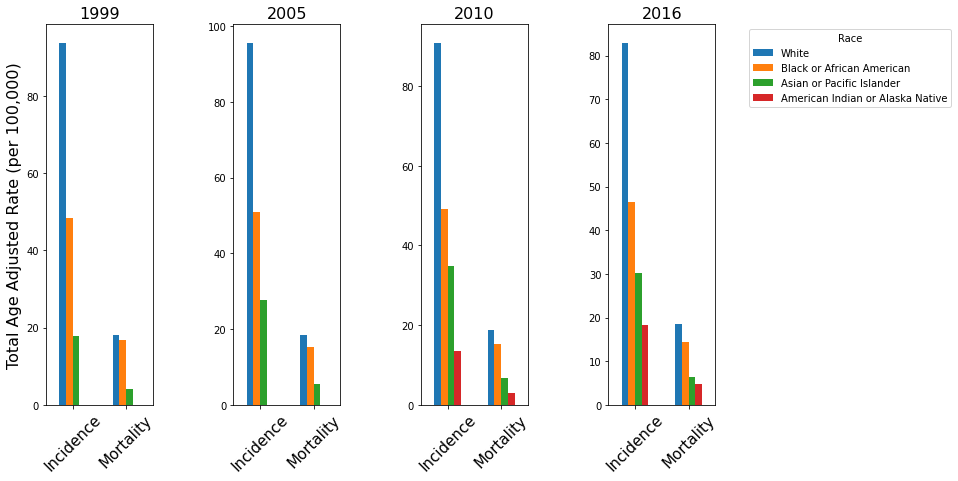

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, figsize=(12,7))
ax1.set_ylabel('Total Age Adjusted Rate (per 100,000)', size=16)
lungdf1999[races].plot(ax=ax1, kind="bar")
lungdf2005[races].plot(ax=ax2, kind="bar")
lungdf2010[races].plot(ax=ax3, kind="bar")
lungdf2016[races].plot(ax=ax4, kind="bar")
fig.subplots_adjust(wspace = 0.75, hspace=0.5)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.legend(loc='upper right', bbox_to_anchor=(3.25, 1), title="Race")
ax1.set_title("1999", size=16)
ax2.set_title("2005", size=16)
ax3.set_title("2010", size=16)
ax4.set_title("2016", size=16)
ax1.tick_params(axis='x', labelsize=15, rotation=45)
ax2.tick_params(axis='x', labelsize=15, rotation=45)
ax3.tick_params(axis='x', labelsize=15, rotation=45)
ax4.tick_params(axis='x', labelsize=15, rotation=45)

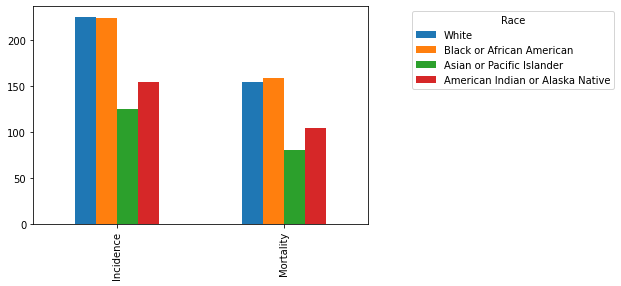

In [26]:
lungdf[races].plot(kind="bar")
plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1), title="Race")

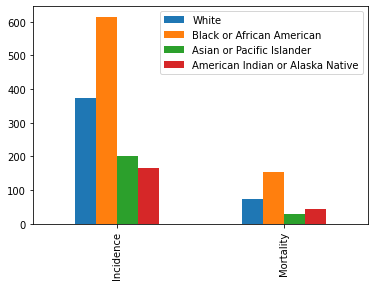

In [27]:
prostdf = cancerdf("Prostate")
prostdf[races].plot(kind="bar")
plt.legend(loc="upper right")

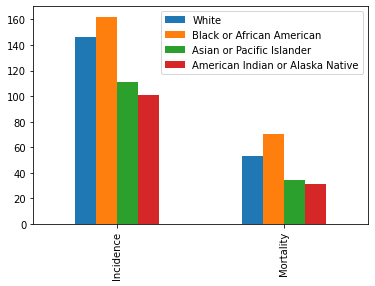

In [28]:
colondf = cancerdf("Colon and Rectum")
colondf[races].plot(kind="bar")
plt.legend(loc="upper right")

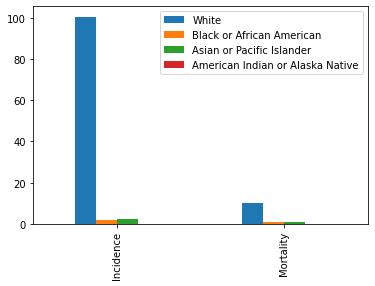

In [29]:
melanomadf = cancerdf("Melanoma of the Skin")
melanomadf[races].plot(kind="bar")

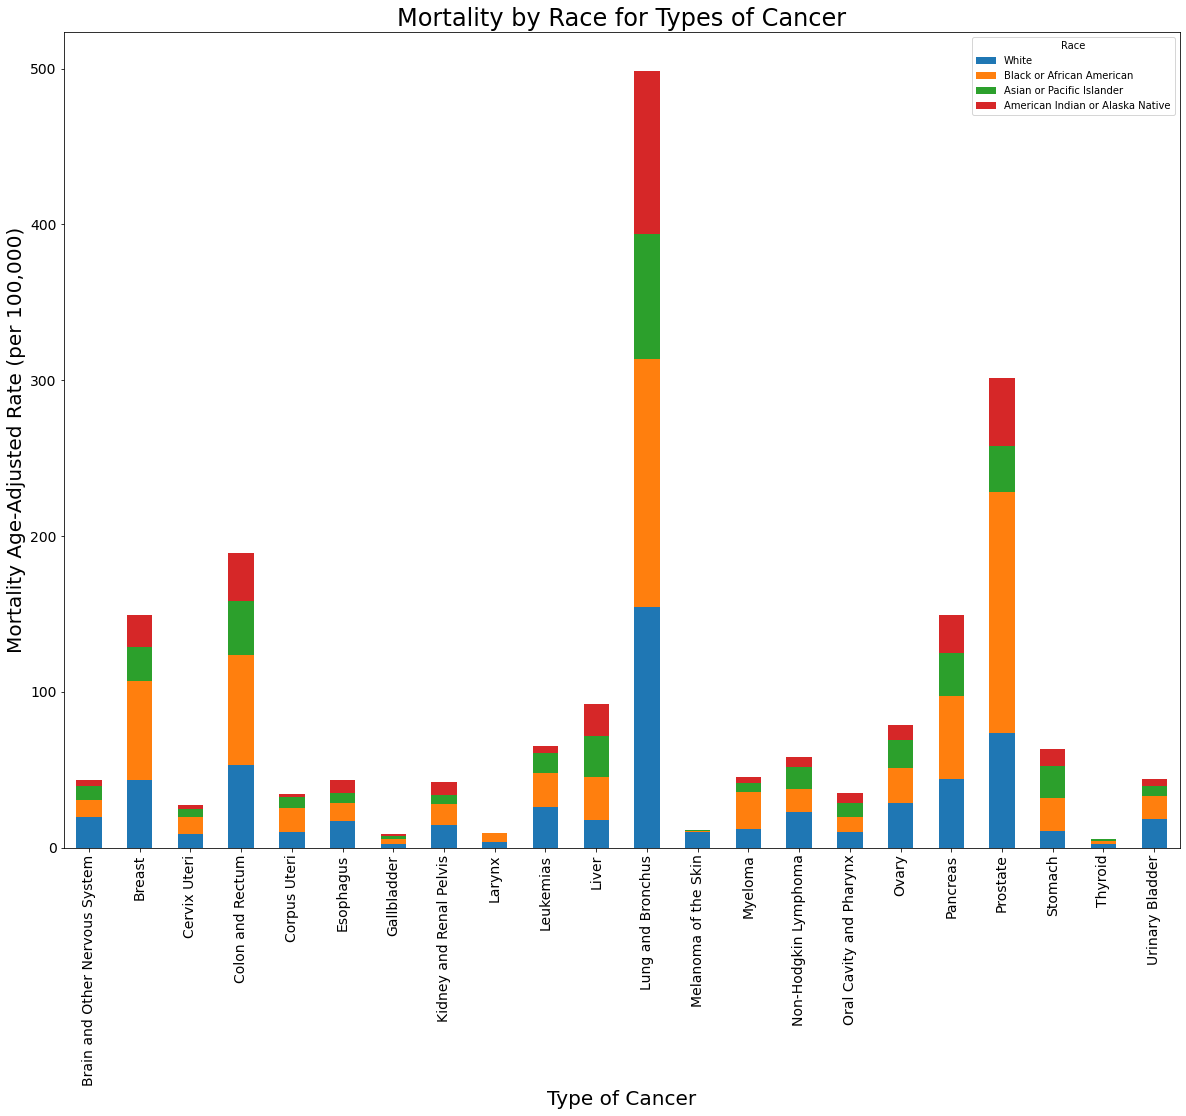

In [44]:
mortdf[races].plot(kind="bar", stacked=True, figsize=(20,15))
plt.ylabel("Mortality Age-Adjusted Rate (per 100,000)", size=20)
plt.xlabel("Type of Cancer", size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Mortality by Race for Types of Cancer", size=24)
plt.legend(title = "Race", loc="best")

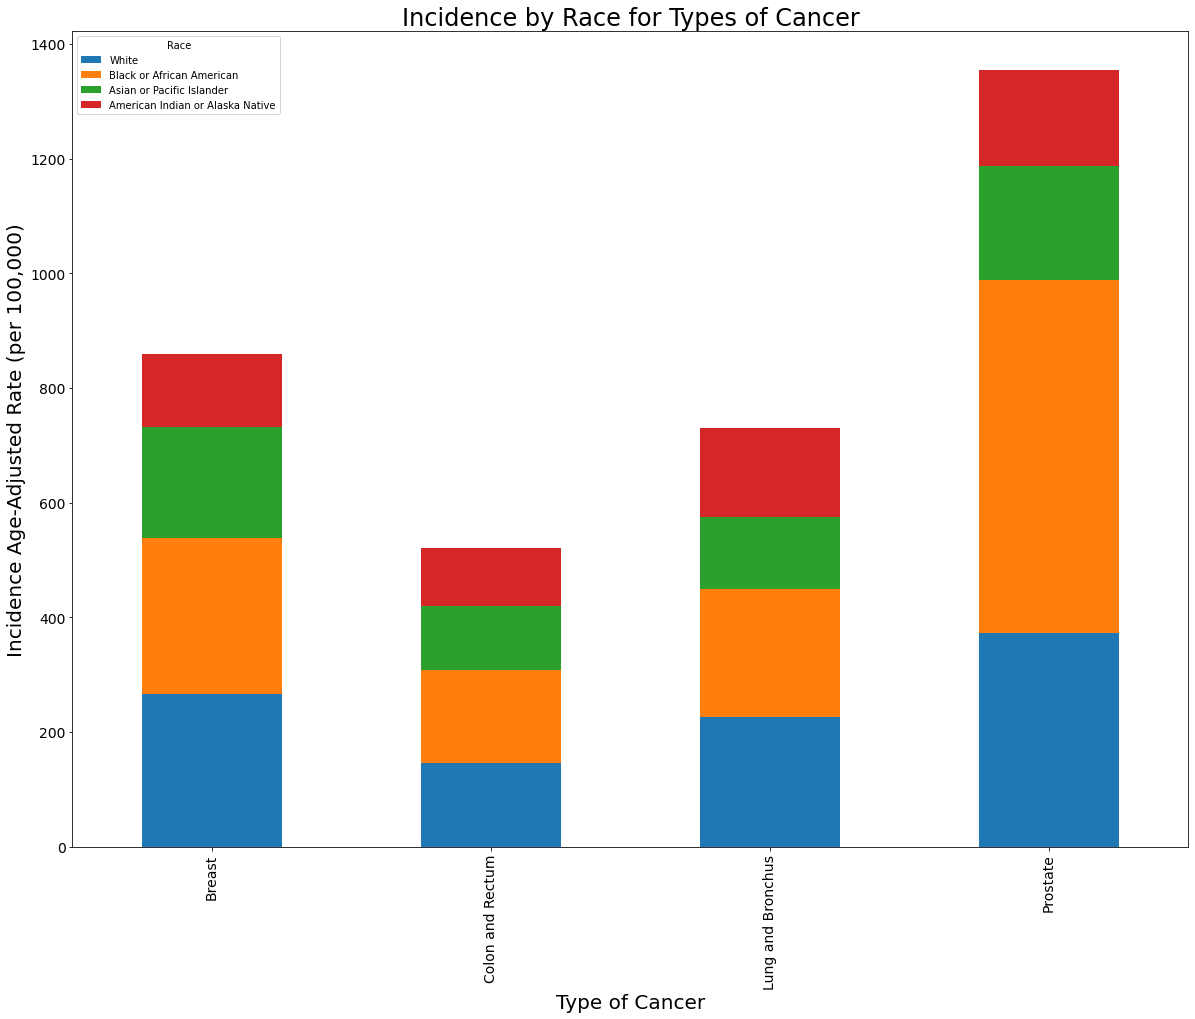

In [42]:
highincdf[races].plot(kind="bar", stacked=True, figsize=(20,15))
plt.ylabel("Incidence Age-Adjusted Rate (per 100,000)", size=20)
plt.xlabel("Type of Cancer", size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Incidence by Race for Types of Cancer", size=24)
plt.legend(title = "Race")

In [32]:
funding_data = pd.read_csv("Funding Data.csv")

for index, row in funding_data.iterrows():
    for col in funding_data.columns:
        if funding_data.at[index, col] == "*" or funding_data.at[index, col] == "**" or funding_data.at[index, col] == "---":
            funding_data.at[index, col] = np.nan

for col in funding_data.columns[1:]:
    funding_data[col] = funding_data[col].astype("float")

cancertypes = list(set(list(funding_data["Unnamed: 0"])))

In [33]:
avgbycancer = {}
for cancer in leading_cancer_sites:
    df = cancer_rates[cancer_rates["Leading Cancer Sites"] == cancer]
    avg = df["Mortality-Incidence Age-Adjusted Rate Ratio"].mean()
    avgbycancer[cancer] = avg
avgbycancer

{'Brain and Other Nervous System': 0.6623207126948775,
 'Breast': 0.18894835164835166,
 'Cervix Uteri': 0.30431400282885435,
 'Colon and Rectum': 0.36629670329670333,
 'Corpus Uteri': 0.08686604774535807,
 'Esophagus': 0.8593939393939394,
 'Gallbladder': 0.5829423728813559,
 'Kidney and Renal Pelvis': 0.2717616926503341,
 'Larynx': 0.3064518413597734,
 'Leukemias': 0.5320693832599118,
 'Liver': 0.7319143206854346,
 'Lung and Bronchus': 0.7506703296703295,
 'Melanoma of the Skin': 0.1404006968641115,
 'Myeloma': 0.5862022598870056,
 'Non-Hodgkin Lymphoma': 0.34616373626373625,
 'Oral Cavity and Pharynx': 0.22751834862385323,
 'Ovary': 0.655658185840708,
 'Pancreas': 0.8921269035532996,
 'Prostate': 0.17439120879120878,
 'Stomach': 0.5392029312288613,
 'Thyroid': 0.047074211502782924,
 'Urinary Bladder': 0.20847830923248056}

In [34]:
avg = {}
for row in range(len(funding_data)):
    mort = funding_data.iloc[row]["Mort."]
    incidence = funding_data.iloc[row]["Incidence"]
    avg[funding_data.iloc[row]["Unnamed: 0"]] = mort/incidence
avg   

{'Bladder': 0.20813838083085212,
 'Brain, ONS': 0.5967302452316077,
 'Breast': 0.19243279441308714,
 'Cervix': 0.34508196721311474,
 'Colon/rectum': 0.3603142316055271,
 'Esophogus': 0.8713942307692307,
 'Hogkin lymph.': 0.15547703180212014,
 'Kidney': 0.2239010989010989,
 'Leukemia': 0.5073170731707317,
 'Liver': 0.7839966832504146,
 'Lung': 0.7069027503145785,
 'Myeloma': 0.5277502477700694,
 'NH Lymphoma': 0.3083613060726274,
 'Oral,pharnyx': 0.21565407772304324,
 'Ovary': 0.6329981718464351,
 'Pancreas': 0.8530366249420491,
 'Prostate': 0.14720066136958618,
 'Melanoma (skin)': 0.12769704975781593,
 'Stomach': 0.5033333333333333,
 'Testes': 0.041273584905660375,
 'Uterus': 0.1828847481021394}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text major ticklabel objects>)

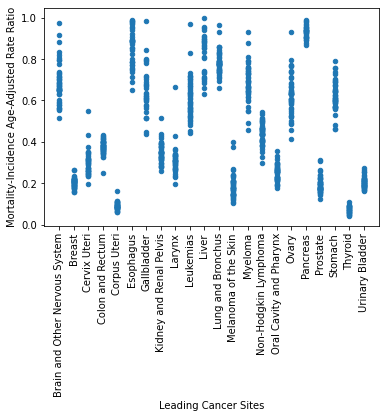

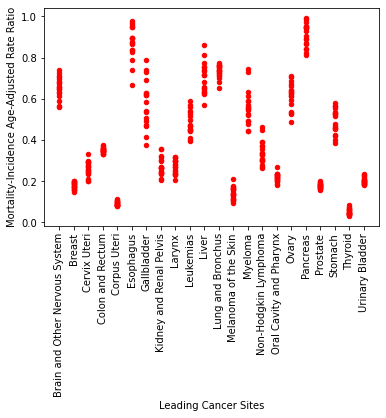

In [35]:
wisconsin = cancer_rates[cancer_rates["State"] == "Wisconsin"]
yr1999 = cancer_rates[cancer_rates["Year"] == 1999]
yr1999.plot.scatter("Leading Cancer Sites", "Mortality-Incidence Age-Adjusted Rate Ratio")
plt.xticks(rotation = 90)
wisconsin.plot.scatter("Leading Cancer Sites", "Mortality-Incidence Age-Adjusted Rate Ratio", c = "r")
plt.xticks(rotation=90)

In [36]:
cancer_rates[cancer_rates["Leading Cancer Sites"] == "Breast"]

,Leading Cancer Sites,Year,State,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
905,Breast,1999,Alabama,0.219,14.780,67.488
906,Breast,1999,Alaska,0.156,10.435,66.870
907,Breast,1999,Arizona,0.209,14.109,67.402
908,Breast,1999,California,0.189,14.079,74.560
909,Breast,1999,Colorado,0.181,13.915,77.004
...,...,...,...,...,...,...
1810,Breast,2016,Virginia,0.171,11.596,67.679
1811,Breast,2016,Washington,0.153,10.631,69.429
1812,Breast,2016,West Virginia,0.193,11.868,61.584
1813,Breast,2016,Wisconsin,0.156,10.628,68.099


In [37]:
cancer_rates_by_race[:5040]

,Leading Cancer Sites,Year,Region,Race,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
0,Brain and Other Nervous System,1999,Northeast,Asian or Pacific Islander,0.366,1.506,4.116
1,Brain and Other Nervous System,1999,Northeast,Black or African American,0.538,2.273,4.228
2,Brain and Other Nervous System,1999,Northeast,White,0.626,4.656,7.438
3,Brain and Other Nervous System,1999,Midwest,Black or African American,0.646,2.590,4.009
4,Brain and Other Nervous System,1999,Midwest,White,0.685,5.035,7.348
...,...,...,...,...,...,...,...
5035,Urinary Bladder,2016,South,White,0.243,4.545,18.737
5036,Urinary Bladder,2016,West,American Indian or Alaska Native,0.302,2.317,7.677
5037,Urinary Bladder,2016,West,Asian or Pacific Islander,0.224,1.894,8.446
5038,Urinary Bladder,2016,West,Black or African American,0.296,3.606,12.189


In [38]:
totalratesbyrace

,Leading Cancer Sites,Year,Region,Race,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
5114,Midwest,American Indian or Alaska Native,33,NaN,NaN,NaN,NaN
5115,Midwest,Asian or Pacific Islander,103,NaN,NaN,NaN,NaN
5116,Midwest,Black or African American,959,NaN,NaN,NaN,NaN
5117,Midwest,White,8389,NaN,NaN,NaN,NaN
5118,Midwest,Other Races and Unknown combined,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6453,West,American Indian or Alaska Native,28,NaN,NaN,NaN,NaN
6454,West,Asian or Pacific Islander,184,NaN,NaN,NaN,NaN
6455,West,Black or African American,121,NaN,NaN,NaN,NaN
6456,West,White,3128,NaN,NaN,NaN,NaN


In [39]:
funding_data["Mort."] / funding_data["Incidence"]

0     0.208138
1     0.596730
2     0.192433
3     0.345082
4     0.360314
5     0.871394
6     0.155477
7     0.223901
8     0.507317
9     0.783997
10    0.706903
11    0.527750
12    0.308361
13    0.215654
14    0.632998
15    0.853037
16    0.147201
17    0.127697
18    0.503333
19    0.041274
20    0.182885
dtype: float64

In [40]:
len(years)

18

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


Text(0.05, 0.5, 'Mortality and Incidence Rates')

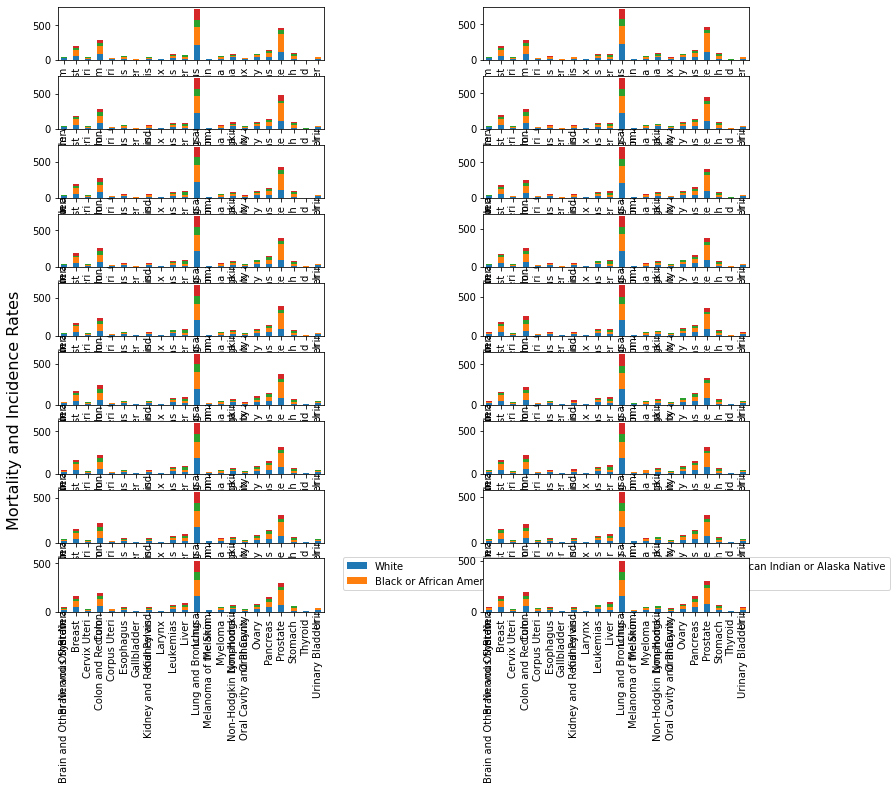

In [41]:
# Plot cancer statistics over time, for each leading cancer site

fig, ax = plt.subplots(9, 2)

categories = 0 # track position in the leading_cancer_sites list
rows = 0 # track row of subplot

while rows <= 8:
    columns = 0 # track column of subplot
    while columns <= 1:
        mortdict = {}
        print(mortdict)
        incdict = {}
        for race in races:
            mortdict[race] = mortbyrace(race, years[categories])
            #incdict[race] = incbyrace(race, years[categories])
        # convert the dictionary to a DataFrame and plot it
        mortdf= pd.DataFrame(mortdict)
        mortdf.plot(ax=ax[rows][columns], kind="bar", stacked=True, legend=False)
        
        #ax[rows][columns].set_xticks([1999, 2007, 2016])
        # increment counters
        columns += 1
        categories += 1
        
        # track progress, as this cell takes a long time to run
    rows += 1
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.3)  # create some space below the plots by increasing the bottom-value
ax.flatten()[-3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3) # try to make one legend for the entire figure
fig.set_size_inches(12,14)
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.3, wspace=0.6, hspace=0.3)
fig.text(0.05,0.5, "Mortality and Incidence Rates", ha="center", va="center", fontsize=16, rotation=90)